## PCA

### Using Stemming

In [82]:
from sklearn.decomposition import PCA
n_components = 30
pca = PCA(n_components=n_components)
pca.fit_transform(train_embedding_stem.iloc[:,:].values)
explained_variance = pca.explained_variance_ratio_

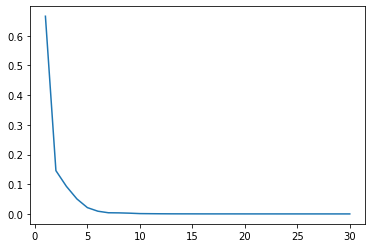

In [83]:
plt.plot(range(1, n_components + 1), explained_variance)

In [84]:
# Building optimal PCA model
columns = ['PC_1','PC_2','PC_3','PC_4','PC_5']
pca = PCA(n_components=5)
pca_train = pca.fit_transform(train_embedding_stem.iloc[:,:].values)
pca_train = pd.DataFrame(pca_train, columns = columns)
pca_train.index = train_embedding_stem.index
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
Word,,,,,
pdo,-0.083957,-0.101917,0.072025,-0.131137,-0.042614
last,2.818713,-2.340580,1.887886,-1.057070,0.973061
switch,-0.740839,0.211866,0.020313,0.027673,0.041538
cool,2.795773,-0.578423,1.372856,-0.476349,-0.433994
phase,1.649645,-0.232718,-0.146072,-0.199874,0.038067


In [85]:
pca_test = pca.transform(test_embedding_stem.iloc[:,:].values)
pca_test = pd.DataFrame(pca_test, columns = columns)
pca_test.index = test_embedding_stem.index
pca_test.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
Word,,,,,
trenberth,-0.841944,0.018273,0.041265,-0.037325,-0.019779
view,1.074254,-0.147287,-0.420310,-0.333984,-0.069854
clarifi,-1.250348,-0.003541,0.111801,-0.020113,-0.020215
paper,2.261435,0.014590,-1.506928,-0.440076,0.074613
imper,-0.934773,-0.002605,0.052792,-0.071805,-0.037336


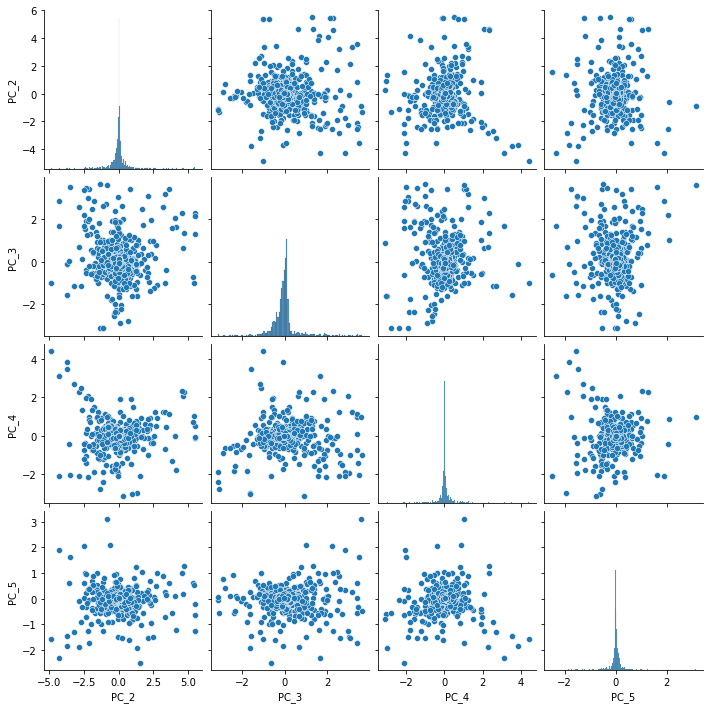

In [86]:
sns.pairplot(pca_test.iloc[:,1:5])

### Using Lemmatization

In [87]:
pca = PCA(n_components=30)
pca.fit_transform(train_embedding_lem.iloc[:,:].values)
explained_variance = pca.explained_variance_ratio_

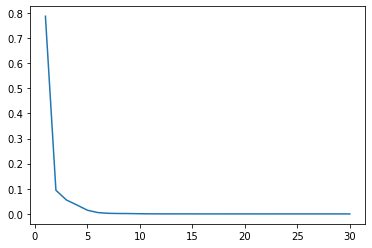

In [88]:
plt.plot(range(1, n_components + 1), explained_variance)

In [89]:
# Building optimal PCA model
pca = PCA(n_components=5)
pca_train_lem = pca.fit_transform(train_embedding_lem.iloc[:,:].values)
pca_train_lem = pd.DataFrame(pca_train_lem, columns = columns)
pca_train_lem.index = train_embedding_lem.index
pca_train_lem.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
Word,,,,,
pdo,0.390634,-0.077504,0.082130,-0.164314,-0.076767
last,3.665612,-2.196739,1.842807,-1.307448,0.801877
switch,-0.260315,0.131765,-0.035370,-0.000706,0.040522
cool,3.717293,-0.409568,1.490529,-0.219909,-0.505988
phase,2.292816,-0.091742,-0.017276,-0.243690,-0.027165


In [90]:
pca_test_lem = pca.transform(test_embedding_lem.iloc[:,:].values)
pca_test_lem = pd.DataFrame(pca_test_lem, columns = columns)
pca_test_lem.index = test_embedding_lem.index
pca_test_lem.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
Word,,,,,
trenberth,-0.405825,0.038868,-0.027864,-0.019687,0.009834
view,1.575511,0.219957,-0.187224,-0.421298,-0.162066
clarify,-0.872855,-0.029532,0.032725,0.002315,-0.012722
paper,3.005911,0.355410,-1.024361,-0.703736,-0.045753
imperative,-0.865941,-0.025641,0.041273,0.003591,-0.008623


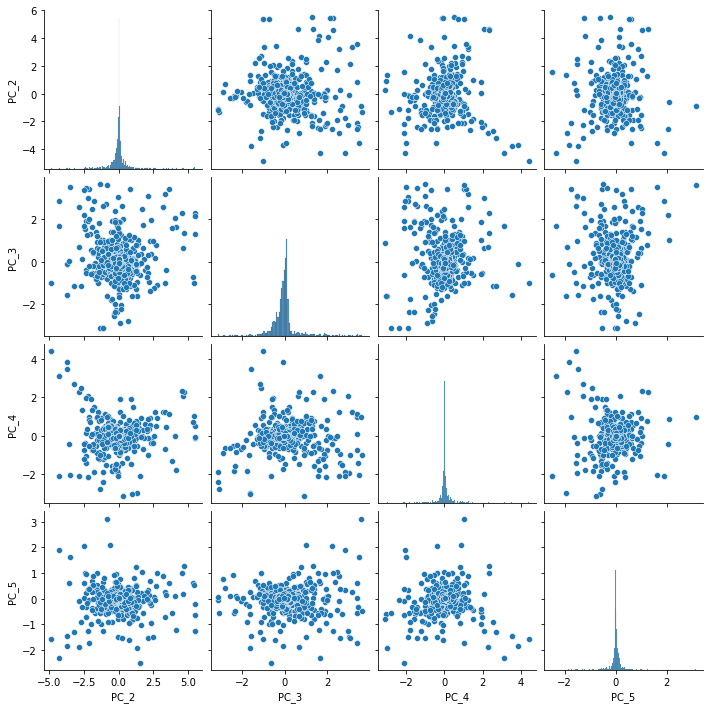

In [91]:
sns.pairplot(pca_test.iloc[:,1:5])

## Cosine Similarity PCA

#### Getting Cosine similarity between all  words in test set [STEMMING]

In [92]:
cos_sim_pca = cosine_similarity(pca_test.iloc[:,:].values, Y=None, dense_output=False)
cos_sim_pca.shape

(1291, 1291)

In [93]:
cos_sim_pca = pd.DataFrame(cos_sim_pca, 
                           columns = list(pca_test.index), 
                           index = list(pca_test.index)
                          )
cos_sim_pca

,trenberth,view,clarifi,paper,imper,climat,chang,plan,track,earth,...,tropospher,moreov,coldest,donald,hoax,classic,feast,follow,coupl,recoveri
trenberth,1.000000,-0.890060,0.998469,-0.839150,0.999021,-0.522358,-0.521878,-0.942803,0.944927,-0.757421,...,-0.714091,0.998076,0.658001,0.886867,0.966482,0.998659,0.998029,-0.952682,-0.753609,0.977207
view,-0.890060,1.000000,-0.907832,0.959462,-0.877489,0.757680,0.666095,0.855952,-0.797196,0.559035,...,0.440977,-0.915880,-0.570604,-0.656673,-0.770760,-0.891468,-0.910548,0.837133,0.926915,-0.864892
clarifi,0.998469,-0.907832,1.000000,-0.864287,0.997357,-0.561082,-0.552741,-0.954277,0.950688,-0.741409,...,-0.710732,0.999454,0.681468,0.875451,0.954222,0.998932,0.999907,-0.941134,-0.768406,0.970435
paper,-0.839150,0.959462,-0.864287,1.000000,-0.836418,0.717925,0.598725,0.888078,-0.807161,0.379974,...,0.414220,-0.866092,-0.672079,-0.547565,-0.679078,-0.843630,-0.865456,0.772967,0.907055,-0.756396
imper,0.999021,-0.877489,0.997357,-0.836418,1.000000,-0.503926,-0.505298,-0.951618,0.954579,-0.746466,...,-0.727616,0.995638,0.676515,0.886285,0.965587,0.998017,0.996561,-0.949582,-0.739155,0.968980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
classic,0.998659,-0.891468,0.998932,-0.843630,0.998017,-0.552586,-0.556857,-0.952652,0.956889,-0.762484,...,-0.737243,0.997667,0.690473,0.896062,0.963670,1.000000,0.998782,-0.936795,-0.740694,0.974501
feast,0.998029,-0.910548,0.999907,-0.865456,0.996561,-0.568932,-0.559444,-0.953929,0.950011,-0.745735,...,-0.712008,0.999555,0.680697,0.876284,0.954075,0.998782,1.000000,-0.938251,-0.768618,0.971039
follow,-0.952682,0.837133,-0.941134,0.772967,-0.949582,0.335192,0.323132,0.831201,-0.824671,0.658353,...,0.523056,-0.945299,-0.458014,-0.782974,-0.918446,-0.936795,-0.938251,1.000000,0.802836,-0.941171
coupl,-0.753609,0.926915,-0.768406,0.907055,-0.739155,0.582015,0.442577,0.686879,-0.593061,0.296343,...,0.113986,-0.781553,-0.339786,-0.404123,-0.594076,-0.740694,-0.768618,0.802836,1.000000,-0.719469


#### Comparing most similar words in PCA to Word2Vec most similar words [STEMMING]

In [94]:
cos_most_sim_pca_stem = get_most_similar_words(cos_sim_pca, n_similar=5)
cos_most_sim_pca_stem.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,contrari,whose,pivot,sent,bia
view,discuss,conclus,note,independ,comput
clarifi,inher,gravimetri,jonathan,graphic,stopper
paper,research,bodi,scienc,name,journal
imper,denier,brink,anticip,drastic,trenberth


In [95]:
# create a dataframe of similar words if cosine similarity > cos_threshold
cos_sim_pca = (cos_sim_pca > cos_threshold).astype(int)
cos_sim_pca.head()

,trenberth,view,clarifi,paper,imper,climat,chang,plan,track,earth,...,tropospher,moreov,coldest,donald,hoax,classic,feast,follow,coupl,recoveri
trenberth,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
view,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clarifi,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
paper,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imper,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [96]:
precision_recall_fscore(cos_similar_stem, cos_sim_pca)

Precision:  0.77
Recall:  0.64
F1_score:  0.58


#### Getting Cosine similarity between all  words in test set [LEMMATIZING]

In [97]:
cos_sim_pca_lem = cosine_similarity(pca_test_lem.iloc[:,:].values, Y=None, dense_output=False)
cos_sim_pca_lem.shape

(1364, 1364)

In [98]:
cos_sim_pca_lem = pd.DataFrame(cos_sim_pca_lem, 
                           columns = list(pca_test_lem.index), 
                           index = list(pca_test_lem.index))
cos_sim_pca_lem

,trenberth,view,clarify,paper,imperative,climate,change,plan,track,earth,...,moreover,coldest,donald,hoax,classic,feast,river,follow,couple,recovery
trenberth,1.000000,-0.908812,0.984085,-0.869298,0.983590,-0.909638,-0.945029,-0.899126,-0.179309,-0.864341,...,0.981822,-0.126357,-0.579548,0.349673,0.996439,0.984721,-0.957064,-0.987976,0.981949,0.979389
view,-0.908812,1.000000,-0.953353,0.975016,-0.954530,0.982090,0.979686,0.936940,0.127916,0.789341,...,-0.959790,-0.039569,0.779813,0.019465,-0.921399,-0.954680,0.946101,0.907987,-0.957250,-0.961945
clarify,0.984085,-0.953353,1.000000,-0.933056,0.999928,-0.964356,-0.986417,-0.958559,-0.096465,-0.829308,...,0.999388,-0.027462,-0.682640,0.246895,0.993246,0.999960,-0.987805,-0.985305,0.999878,0.999053
paper,-0.869298,0.975016,-0.933056,1.000000,-0.935932,0.994242,0.977225,0.934781,0.117927,0.651287,...,-0.934166,-0.015550,0.886908,0.091511,-0.887501,-0.933388,0.960078,0.902857,-0.937676,-0.940602
imperative,0.983590,-0.954530,0.999928,-0.935932,1.000000,-0.966232,-0.987444,-0.958112,-0.099764,-0.824101,...,0.999161,-0.029728,-0.688840,0.238514,0.992580,0.999922,-0.989101,-0.986053,0.999907,0.999169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feast,0.984721,-0.954680,0.999960,-0.933388,0.999922,-0.964396,-0.986382,-0.957012,-0.101575,-0.831083,...,0.999464,-0.030134,-0.682304,0.243574,0.993360,1.000000,-0.987266,-0.985324,0.999872,0.999154
river,-0.957064,0.946101,-0.987805,0.960078,-0.989101,0.980050,0.989757,0.958137,0.102654,0.734189,...,-0.983964,0.047356,0.770976,-0.173026,-0.969632,-0.987266,1.000000,0.982176,-0.988517,-0.986880
follow,-0.987976,0.907987,-0.985305,0.902857,-0.986053,0.933935,0.958837,0.910193,0.185104,0.781095,...,-0.979330,0.152408,0.668428,-0.298543,-0.987777,-0.985324,0.982176,1.000000,-0.983696,-0.979829
couple,0.981949,-0.957250,0.999878,-0.937676,0.999907,-0.967817,-0.988659,-0.960930,-0.092218,-0.826185,...,0.999536,-0.019087,-0.689966,0.232486,0.991698,0.999872,-0.988517,-0.983696,1.000000,0.999547


#### Comparing most similar words in PCA to Word2Vec most similar words [LEMMATIZING]

In [99]:
cos_most_sim_pca_lem = get_most_similar_words(cos_sim_pca_lem, n_similar=5)
cos_most_sim_pca_lem.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,cook,business,richard,steig,problems
view,un,agreement,correct,scientist,certain
clarify,prediction,narisma,grandchildren,nsw,combine
paper,research,journal,noaa,publish,climate
imperative,george,elliptical,astound,connie,reflection


In [100]:
# create a dataframe of similar words if cosine similarity > cos_threshold
cos_sim_pca_lem = (cos_sim_pca_lem > cos_threshold).astype(int)
cos_sim_pca_lem.head()

,trenberth,view,clarify,paper,imperative,climate,change,plan,track,earth,...,moreover,coldest,donald,hoax,classic,feast,river,follow,couple,recovery
trenberth,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
view,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clarify,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1
paper,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imperative,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1


In [101]:
precision_recall_fscore(cos_similar_lem, cos_sim_pca_lem)

Precision:  0.7
Recall:  0.62
F1_score:  0.51


## KNN GRAPH

#### Using KNN on word embedding to get most similar word [STEMMING]

In [102]:
knn_similar_stem_pca = kneighbors_graph(pca_test.iloc[:,:].values, 6, mode='connectivity', include_self=True)

In [103]:
knn_similar_stem_pca = pd.DataFrame(knn_similar_stem_pca.toarray(), 
                    columns = list(pca_test.index), 
                    index = list(pca_test.index)
                   )
knn_similar_stem_pca.head()

,trenberth,view,clarifi,paper,imper,climat,chang,plan,track,earth,...,tropospher,moreov,coldest,donald,hoax,classic,feast,follow,coupl,recoveri
trenberth,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clarifi,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paper,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imper,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Comparing most similar words in PCA to Word2Vec most similar words [STEMMING]

In [104]:
knn_most_similar_stem_pca = get_most_similar_words(knn_similar_stem_pca, n_similar=5)
knn_most_similar_stem_pca.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,evenli,bia,massachusett,chevron,eg
view,statist,featur,conclus,repres,empir
clarifi,blew,nowher,inher,gordon,sake
paper,issu,peer,public,accord,wave
imper,whose,anyon,landscap,citizen,brink


In [105]:
precision_recall_fscore(knn_similar_stem, knn_similar_stem_pca)

Precision:  0.94
Recall:  0.95
F1_score:  0.94


#### Using KNN on word embedding to get most similar word [LEMMATIZING]

In [106]:
knn_similar_lem_pca = kneighbors_graph(pca_test_lem.iloc[:,:].values, 2, mode='connectivity', include_self=True)

In [107]:
knn_similar_lem_pca = pd.DataFrame(knn_similar_lem_pca.toarray(), 
                    columns = list(pca_test_lem.index), 
                    index = list(pca_test_lem.index)
                   )
knn_similar_lem_pca.head()

,trenberth,view,clarify,paper,imperative,climate,change,plan,track,earth,...,moreover,coldest,donald,hoax,classic,feast,river,follow,couple,recovery
trenberth,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clarify,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paper,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imperative,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Comparing most similar words in PCA to Word2Vec most similar words [LEMMATIZING]

In [108]:
knn_most_similar_lem_pca = get_most_similar_words(knn_similar_lem_pca, n_similar=5)
knn_most_similar_lem_pca.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,general,view,clarify,paper,imperative
view,think,trenberth,clarify,paper,imperative
clarify,combine,trenberth,view,paper,imperative
paper,accord,trenberth,view,clarify,imperative
imperative,november,trenberth,view,clarify,paper


In [109]:
precision_recall_fscore(knn_similar_lem, knn_similar_lem_pca)

Precision:  0.98
Recall:  0.7
F1_score:  0.76


### Applying KNN Classification on the PCA Embeddings [STEMMING]

In [110]:
knn_train_stem = train_data[['claim', 'stemmed_words', 'claim_label']]
knn_test_stem = test_data[['claim', 'stemmed_words', 'claim_label']]

# getting the sentence embedding of the training data
knn_train_stem = get_sentence_embedding(knn_train_stem, 'stemmed_words', pca_train, pca_test)
knn_train_stem.shape

(1108, 7)

In [111]:
knn_train_stem.head()

,claim,feature_1,feature_2,feature_3,feature_4,feature_5,claim_label
0,"When the PDO last switched to a cool phase, gl...",2.342507,-0.934130,1.466551,-0.737183,0.026892,2
1,as time progresses and fossil fuel emissions i...,2.923760,0.413706,0.696548,0.211850,0.229838,2
2,Hurricanes aren't linked to global warming,2.588164,0.051800,1.193600,-0.899286,-0.760662,2
3,Ljungqvist's millennial temperature reconstruc...,0.596305,-0.432628,0.339635,-0.217025,0.015623,2
4,"More importantly, the OISM list only contains ...",0.896739,0.218526,-0.743443,-0.550011,-0.262054,2


In [112]:
knn_test_stem = get_sentence_embedding(knn_test_stem, 'stemmed_words', pca_train, pca_test)
knn_test_stem.shape

(273, 7)

In [113]:
knn_test_stem.head()

,claim,feature_1,feature_2,feature_3,feature_4,feature_5,claim_label
0,"Trenberth's views are clarified in the paper ""...",1.280101,0.484662,-0.024674,-0.641529,-0.414122,0
1,"When life is considered, ocean acidification i...",1.726194,0.076409,-0.123122,0.292481,-0.031361,1
2,In recent decades this warming has been accomp...,2.393332,-0.507997,0.948396,-0.279847,-0.586646,0
3,while it’s true that studies in some regions s...,1.511841,-0.731802,-0.295870,0.299804,-0.157321,1
4,It is unclear whether global warming is increa...,2.433476,0.275739,1.269268,-0.455175,-0.513297,0


In [114]:
X_train = knn_train_stem.iloc[:,1:-1].values
y_train = knn_train_stem.iloc[:,-1].values
X_test = knn_test_stem.iloc[:,1:-1].values
y_test = knn_test_stem.iloc[:,-1].values

In [115]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

***** Training Set Evaluation *****

confusion Matrix


,0,1,2
0,439,28,58
1,110,72,21
2,157,28,195


Accuracy:  63.72
F1_score:  0.62


***** Test Set Evaluation *****

confusion Matrix


,0,1,2
0,55,3,7
1,16,6,2
2,34,3,11


Accuracy:  52.55
F1_score:  0.48


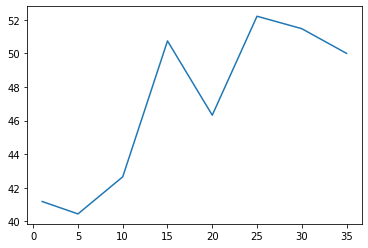

In [116]:
run_knn_opt(X_train, X_val, X_test, y_train, y_val, y_test, [1,5,10,15,20,25,30,35])

In [117]:
k_opt = 25

classifier = KNeighborsClassifier(n_neighbors = k_opt)
classifier.fit(X_train,y_train)

# Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
y_pred_val = classifier.predict(X_val)


# Evaluating the model
accuracy_test = round(100 * accuracy_score(y_test, y_pred), 2)
cm_test = pd.DataFrame(confusion_matrix(y_test,y_pred))
PRF_test = precision_recall_fscore_support(y_test, y_pred, average='weighted')

accuracy_train = round(100 * accuracy_score(y_train, y_pred_train), 2)
cm_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train))
PRF_train = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')

accuracy_val = round(100 * accuracy_score(y_val, y_pred_val), 2)
cm_val = pd.DataFrame(confusion_matrix(y_val,y_pred_val))
PRF_val = precision_recall_fscore_support(y_val, y_pred_val, average='weighted')

print("***** Test Set Evaluation *****")
print("Confusion Matrix")
display(cm_test)
print("Accuracy: ", accuracy_test)
print("Precision: ", round(PRF_test[0], 2))
print("Recall: ", round(PRF_test[1], 2))
print("F1_score: ", round(PRF_test[2], 2))

print()

print("***** Training Set Evaluation *****")
print("Confusion Matrix")
display(cm_train)
print("Accuracy: ", accuracy_train)
print("Precision: ", round(PRF_train[0], 2))
print("Recall: ", round(PRF_train[1], 2))
print("F1_score: ", round(PRF_train[2], 2))
print()

print("***** Validation Set Evaluation *****")
print("Confusion Matrix")
display(cm_val)
print("Accuracy: ", accuracy_val)
print("Precision: ", round(PRF_val[0], 2))
print("Recall: ", round(PRF_val[1], 2))
print("F1_score: ", round(PRF_val[2], 2))

***** Test Set Evaluation *****
Confusion Matrix


C:\Users\jubil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2
0,60,0,5
1,22,0,2
2,32,0,16


Accuracy:  55.47
Precision:  0.49
Recall:  0.55
F1_score:  0.48

***** Training Set Evaluation *****
Confusion Matrix


,0,1,2
0,441,6,78
1,168,7,28
2,267,6,107


Accuracy:  50.09
Precision:  0.48
Recall:  0.5
F1_score:  0.43

***** Validation Set Evaluation *****
Confusion Matrix


,0,1,2
0,53,0,11
1,21,1,4
2,29,0,17


Accuracy:  52.21
Precision:  0.61
Recall:  0.52
F1_score:  0.46


### Applying KNN Classification on the PCA Embeddings [LEMMATIZATION]

In [118]:
knn_train_lem = train_data[['claim', 'lemmatized_words', 'claim_label']]
knn_test_lem = test_data[['claim', 'lemmatized_words', 'claim_label']]

In [119]:
# getting the sentence embedding of the training data
knn_train_lem = get_sentence_embedding(knn_train_lem, 'lemmatized_words', pca_train_lem, pca_test_lem)
knn_train_lem.shape

(1108, 7)

In [120]:
knn_train_lem.head()

,claim,feature_1,feature_2,feature_3,feature_4,feature_5,claim_label
0,"When the PDO last switched to a cool phase, gl...",2.469516,-0.764223,1.013777,-0.467078,-0.094833,2
1,as time progresses and fossil fuel emissions i...,2.818618,0.484715,0.050784,0.097857,0.271028,2
2,Hurricanes aren't linked to global warming,2.430807,0.053082,1.652860,-0.325001,-0.996446,2
3,Ljungqvist's millennial temperature reconstruc...,0.594432,-0.125150,-0.076308,-0.071767,0.033213,2
4,"More importantly, the OISM list only contains ...",1.284364,0.150588,-0.318808,-0.129887,0.020367,2


In [121]:
knn_test_lem = get_sentence_embedding(knn_test_lem, 'lemmatized_words', pca_train_lem, pca_test_lem)
knn_test_lem.shape

(273, 7)

In [122]:
knn_test_lem.head()

,claim,feature_1,feature_2,feature_3,feature_4,feature_5,claim_label
0,"Trenberth's views are clarified in the paper ""...",2.000594,0.236712,0.162418,-0.288144,-0.202234,0
1,"When life is considered, ocean acidification i...",2.015943,0.185525,-0.036099,0.139149,-0.003935,1
2,In recent decades this warming has been accomp...,2.156494,-0.532134,0.544053,0.290735,-0.367789,0
3,while it’s true that studies in some regions s...,1.608617,-0.474315,-0.369140,0.221120,0.029505,1
4,It is unclear whether global warming is increa...,1.911297,0.071591,0.735777,-0.072304,-0.396264,0


In [123]:
X_train = knn_train_lem.iloc[:,1:-1].values
y_train = knn_train_lem.iloc[:,-1].values
X_test = knn_test_lem.iloc[:,1:-1].values
y_test = knn_test_lem.iloc[:,-1].values

In [124]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

***** Training Set Evaluation *****

confusion Matrix


,0,1,2
0,439,22,64
1,118,57,28
2,193,27,160


Accuracy:  59.21
F1_score:  0.57


***** Test Set Evaluation *****

confusion Matrix


,0,1,2
0,45,9,11
1,13,3,8
2,33,3,12


Accuracy:  43.8
F1_score:  0.41


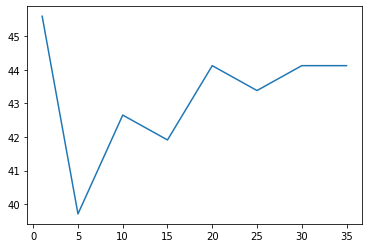

In [125]:
run_knn_opt(X_train, X_val, X_test, y_train, y_val, y_test, [1,5,10,15,20,25,30,35])

In [126]:
k_opt = 25

classifier = KNeighborsClassifier(n_neighbors = k_opt)
classifier.fit(X_train,y_train)

# Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
y_pred_val = classifier.predict(X_val)


# Evaluating the model
accuracy_test = round(100 * accuracy_score(y_test, y_pred), 2)
cm_test = pd.DataFrame(confusion_matrix(y_test,y_pred))
PRF_test = precision_recall_fscore_support(y_test, y_pred, average='weighted')

accuracy_train = round(100 * accuracy_score(y_train, y_pred_train), 2)
cm_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train))
PRF_train = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')

accuracy_val = round(100 * accuracy_score(y_val, y_pred_val), 2)
cm_val = pd.DataFrame(confusion_matrix(y_val,y_pred_val))
PRF_val = precision_recall_fscore_support(y_val, y_pred_val, average='weighted')

print("***** Test Set Evaluation *****")
print("Confusion Matrix")
display(cm_test)
print("Accuracy: ", accuracy_test)
print("Precision: ", round(PRF_test[0], 2))
print("Recall: ", round(PRF_test[1], 2))
print("F1_score: ", round(PRF_test[2], 2))

print()

print("***** Training Set Evaluation *****")
print("Confusion Matrix")
display(cm_train)
print("Accuracy: ", accuracy_train)
print("Precision: ", round(PRF_train[0], 2))
print("Recall: ", round(PRF_train[1], 2))
print("F1_score: ", round(PRF_train[2], 2))
print()

print("***** Validation Set Evaluation *****")
print("Confusion Matrix")
display(cm_val)
print("Accuracy: ", accuracy_val)
print("Precision: ", round(PRF_val[0], 2))
print("Recall: ", round(PRF_val[1], 2))
print("F1_score: ", round(PRF_val[2], 2))

***** Test Set Evaluation *****
Confusion Matrix


,0,1,2
0,49,1,15
1,20,0,4
2,38,0,10


Accuracy:  43.07
Precision:  0.34
Recall:  0.43
F1_score:  0.36

***** Training Set Evaluation *****
Confusion Matrix


,0,1,2
0,443,3,79
1,145,13,45
2,268,1,111


Accuracy:  51.17
Precision:  0.55
Recall:  0.51
F1_score:  0.45

***** Validation Set Evaluation *****
Confusion Matrix


,0,1,2
0,47,1,16
1,18,2,6
2,36,0,10


Accuracy:  43.38
Precision:  0.45
Recall:  0.43
F1_score:  0.38
